In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=fc29d8265f7971f17286b6d08b08f68e8a9a5be16d509c4f8f10d0508a6d3a03
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

np.random.seed(42)
x = np.random.rand(100, 1)
true_a, true_b = 1, 2
y = true_a + true_b*x + 0.1*np.random.randn(100, 1)

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

dataset = TensorDataset(x_tensor, y_tensor) # dataset = CustomDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)
    
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.input_dim=input_dim
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function
        out = self.fc1(x) #torch.transpose(x,0,1)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out

def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(y, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

# Estimate a and b
torch.manual_seed(42)

#model = ManualLinearRegression().to(device) # model = nn.Sequential(nn.Linear(1, 1)).to(device)

input_dim = 1
hidden_dim = 20
output_dim = 1
model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train_step = make_train_step(model, loss_fn, optimizer)

n_epochs = 100
training_losses = []
validation_losses = []
#print(model.state_dict())

for epoch in range(n_epochs):
    batch_losses = []
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss = train_step(x_batch, y_batch)
        batch_losses.append(loss)
    training_loss = np.mean(batch_losses)
    training_losses.append(training_loss)

    with torch.no_grad():
        val_losses = []
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            model.eval()
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat).item()
            val_losses.append(val_loss)
        validation_loss = np.mean(val_losses)
        validation_losses.append(validation_loss)

    print(f"[{epoch+1}] Training loss: {training_loss:.3f}\t Validation loss: {validation_loss:.3f}")

#print(model.state_dict())

[1] Training loss: 0.852	 Validation loss: 0.032
[2] Training loss: 0.047	 Validation loss: 0.023
[3] Training loss: 0.031	 Validation loss: 0.017
[4] Training loss: 0.022	 Validation loss: 0.014
[5] Training loss: 0.017	 Validation loss: 0.012
[6] Training loss: 0.014	 Validation loss: 0.010
[7] Training loss: 0.011	 Validation loss: 0.009
[8] Training loss: 0.010	 Validation loss: 0.009
[9] Training loss: 0.009	 Validation loss: 0.009
[10] Training loss: 0.009	 Validation loss: 0.008
[11] Training loss: 0.009	 Validation loss: 0.008
[12] Training loss: 0.008	 Validation loss: 0.008
[13] Training loss: 0.008	 Validation loss: 0.008
[14] Training loss: 0.008	 Validation loss: 0.008
[15] Training loss: 0.008	 Validation loss: 0.008
[16] Training loss: 0.008	 Validation loss: 0.008
[17] Training loss: 0.008	 Validation loss: 0.008
[18] Training loss: 0.008	 Validation loss: 0.008
[19] Training loss: 0.008	 Validation loss: 0.008
[20] Training loss: 0.008	 Validation loss: 0.008
[21] Trai

(100,) (100,)


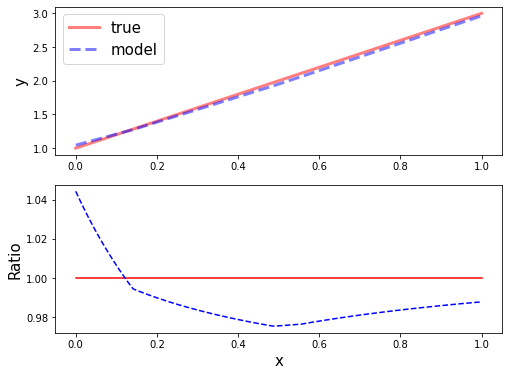

In [ ]:
xx= np.linspace(0,1,100)
yy = np.squeeze(true_a + true_b*xx)

y = np.squeeze(model(torch.Tensor(xx.reshape(-1,1))).detach().numpy())

print(y.shape,yy.shape)
import matplotlib.pyplot as plt
%matplotlib inline
fs=15
fig, axs = plt.subplots(2, 1, figsize=(8,6))
axs[0].plot(xx, yy, lw=3,ls='-',color='r',label='true',alpha=0.5)
axs[0].plot(xx, y, lw=3,ls='--',color='b',label='model',alpha=0.5)
axs[1].plot(xx, yy/yy, ls='-',color='r')
axs[1].plot(xx, y/yy,ls='--',color='b')
axs[0].set_ylabel("y",fontsize=fs)
axs[1].set_ylabel("Ratio",fontsize=fs)
axs[1].set_xlabel("x",fontsize=fs)
axs[0].legend(fontsize=fs)